In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime 
import keras
#from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers.core import Dense
from keras.regularizers import l2
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from datetime import date
from pandas import read_csv
#from sklearn.preprocessing import scale
from sklearn import preprocessing
from keras.layers import Activation, SimpleRNN


#Importar Data
directorio = "/home/marco/Documentos/Jupyter Notebook/Machine Learning/Proyecto Final/empleados.csv"
df_empleados = pd.read_csv(directorio) #,index_col="id"

df_empleados.tail()

Using TensorFlow backend.


,id,sexo,fechnac,educ,expprev,catlab,salini,tiempemp,salario
466,468,m,11/28/1965,16,36,3,19980,64,55750
467,469,m,6/1/1964,15,57,1,13950,64,25200
468,470,h,1/22/1964,12,69,1,15750,64,26250
469,471,h,8/3/1966,15,32,1,15750,64,26400
470,472,h,2/21/1966,15,46,1,15750,63,39150


Se muestra una tabla con la fecha de nacimiento, salario actual, salario inicial y tiempo en la compania en meses. Ya que un dato como fecha de nacimiento no es muy útil se lo transforma en edad de la persona y se agrega esta columna y se elimina la fecha de nacimiento:

In [ ]:
#Determinar Edad
fecha_nacimiento=df_empleados["fechnac"]
edad=pd.Series(np.zeros(len(fecha_nacimiento)))
edad.astype(int)
today = date.today()
i=0
for fecha in fecha_nacimiento:
    edad[i]=int(today.year - pd.to_datetime(fecha).year - ((today.month, today.day) < (pd.to_datetime(fecha).month, pd.to_datetime(fecha).day)))
    i=i+1
edad=edad.astype(int)
edad.tail()

466    53
467    55
468    55
469    53
470    53
dtype: int64

In [ ]:
#Añadir colunma edad y eliminar fecha de nacimiento
df_empleados=df_empleados.drop(columns="fechnac")
df_empleados["edad"]=edad

Para leer los datos más facilmente se reordenan las columnas:

In [ ]:
#Reordenar Columnas
orden_columnas=[ "sexo","edad","educ","expprev", "catlab","salini", "tiempemp","salario"]
df_empleados=df_empleados[orden_columnas]
df_empleados.head()

,sexo,edad,educ,expprev,catlab,salini,tiempemp,salario
0,h,67,15,144,3,27000,98,57000
1,h,61,16,36,1,18750,98,40200
2,m,90,12,381,1,12000,98,21450
3,m,72,8,190,1,13200,98,21900
4,h,64,15,138,1,21000,98,45000


De los datos disponibles nos centraremos en los salarios iniciales y actuales para determinar, valorea máximos, mínimos, media, mediana, desviación estandar y varianza.

In [ ]:
#información de los Datos
salarioi_min=df_empleados["salini"].min()
salarioi_max=df_empleados["salini"].max()
salarioi_medio=df_empleados["salini"].mean()
mediana_salarioi=np.median(df_empleados["salini"])
desv_salarioi=np.std(df_empleados["salini"])
var_salarioi=np.var(df_empleados["salini"])
print(f"El salario inicial mínino es: {salarioi_min}")
print(f"El salario inicial máximo es: {salarioi_max}")
print(f"El salario inicial medio es: {salarioi_medio}")
print(f"La mediana del salario inicial es: {mediana_salarioi}")
print(f"La desviacion estandar del salario inicial es: {desv_salarioi}")
print(f"La varianza del salario inicial es: {var_salarioi}")

print("")

salariof_min=df_empleados["salario"].min()
salariof_max=df_empleados["salario"].max()
salariof_medio=df_empleados["salario"].mean()
mediana_salariof=np.median(df_empleados["salario"])
desv_salariof=np.std(df_empleados["salario"])
var_salariof=np.var(df_empleados["salario"])
print(f"El salario actual mínino es: {salariof_min}")
print(f"El salario actual máximo es: {salariof_max}")
print(f"El salario actual medio es: {salariof_medio}")
print(f"La mediana del salario actual es: {mediana_salariof}")
print(f"La desviacion estandar del salario actual es: {desv_salariof}")
print(f"La varianza del salario actual es: {var_salariof}")


El salario inicial mínino es: 9000
El salario inicial máximo es: 79980
El salario inicial medio es: 17024.150743099788
La mediana del salario inicial es: 15000.0
La desviacion estandar del salario inicial es: 7882.438408641311
La varianza del salario inicial es: 62132835.26602377

El salario actual mínino es: 15750
El salario actual máximo es: 135000
El salario actual medio es: 34456.63481953291
La mediana del salario actual es: 28800.0
La desviacion estandar del salario actual es: 17099.81693643018
La varianza del salario actual es: 292403739.2594244


Para entender mejor se puede representar esta información en un histograma para el salario inicial y actual

Text(0.5, 1.0, 'Salarios')

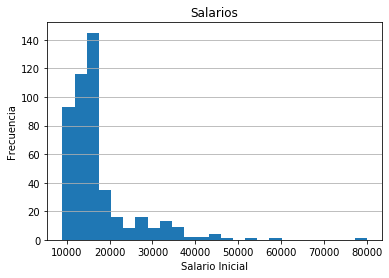

In [ ]:
#Histogramos Salarios
plt.hist(x=df_empleados["salini"],bins=25)
plt.grid(axis='y')
plt.xlabel('Salario Inicial')
plt.ylabel('Frecuencia')
plt.title('Salarios')

Text(0.5, 1.0, 'Salarios')

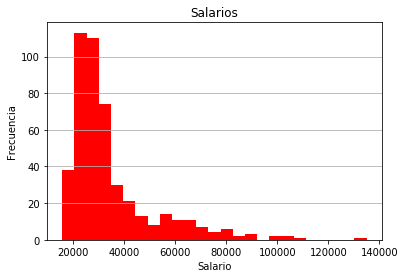

In [ ]:
plt.hist(x=df_empleados["salario"],bins=25,color="r")
plt.grid(axis='y')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Salarios')

Para determinar de que depende el salario actual podemos hacer varios graficos: Salario incial vs Salario Actual, Edad vs Salario Actual y Tiempo en la empresa vs Salario Actual:

Text(0.5, 1.0, 'Salario Inicial vs Salario Final')

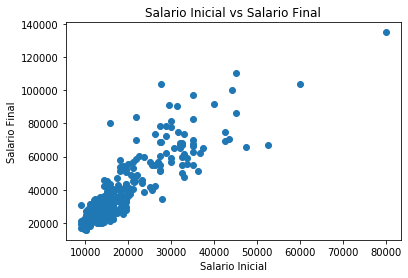

In [ ]:
plt.scatter(df_empleados["salini"],df_empleados["salario"])      
plt.xlabel("Salario Inicial")
plt.ylabel("Salario Final")
plt.title('Salario Inicial vs Salario Final')        

Text(0.5, 1.0, 'Edad vs Salario')

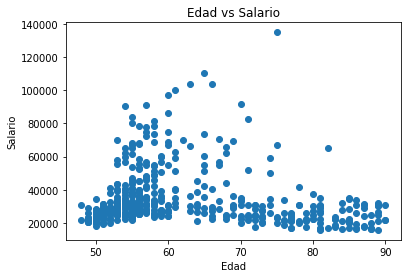

In [ ]:
plt.scatter(df_empleados["edad"],df_empleados["salario"])      
plt.xlabel("Edad")
plt.ylabel("Salario")
plt.title('Edad vs Salario') 

Text(0.5, 1.0, 'Educación vs Salario Final')

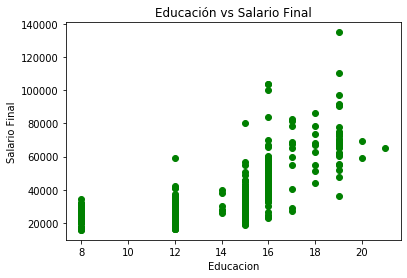

In [ ]:
plt.scatter(df_empleados["educ"],df_empleados["salario"], color='g')      
plt.xlabel("Educacion")
plt.ylabel("Salario Final")
plt.title('Educación vs Salario Final') 

Text(0.5, 1.0, 'Tiempo en la empresa vs Salario')

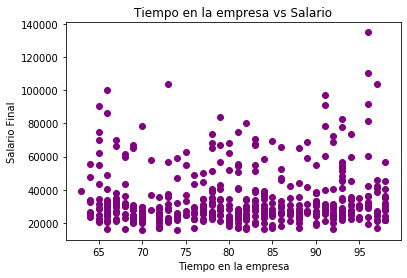

In [ ]:
plt.scatter(df_empleados["tiempemp"],df_empleados["salario"], color='purple')      
plt.xlabel("Tiempo en la empresa")
plt.ylabel("Salario Final")
plt.title('Tiempo en la empresa vs Salario') 

Graficamente se puede determinar que el salario actual depende directamente del salario incial y no depende de la edad ni del tiempo en la empresa, pero podemos calcular el producto Pearson para comprobar esto:

In [ ]:
#Relacion entre las variables
cr1=np.corrcoef(df_empleados["salini"],df_empleados["salario"])[0,1]
cr2=np.corrcoef(df_empleados["tiempemp"],df_empleados["salario"])[0,1]
cr3=np.corrcoef(df_empleados["edad"],df_empleados["salario"])[0,1]
print(f"El coeficiente de relación entre el salario inicial y el salario actual es: {cr1}")
print(f"El coeficiente de relación entre el tiempo en la empresa y el salario es: {cr2}")
print(f"El coeficiente de relación entre edad y el salario es: {cr3}")

El coeficiente de relación entre el salario inicial y el salario actual es: 0.8801653863033593
El coeficiente de relación entre el tiempo en la empresa y el salario es: 0.08097089395795702
El coeficiente de relación entre edad y el salario es: -0.14409230147287813


Se verifica que la relación entre el salario incial y el final es alta, mientras que entre el tiempo en la empresa y el salario actual es baja y entre la edad y el salario no existe. Por esto buscamos la regresión lineal que más se aproxima a la ecuación:
    y= mx + b
Donde y es el salario actual y x es el salario inicial:

In [ ]:
m,b=np.polyfit(df_empleados["salini"],df_empleados["salario"],deg=1)

print(f"la ecuación que mejor se ajusta a la recta es: y={m}x + {b}")
p = np.poly1d(np.polyfit(df_empleados["salini"],df_empleados["salario"],deg=1))
xp=np.arange(df_empleados["salini"].min(),df_empleados["salini"].max(),30)
y=p(xp)

la ecuación que mejor se ajusta a la recta es: y=1.9093922716947758x + 1950.852958491293


Podemos graficamente observar si la recta en verdad se ajusta a los Datos:

Text(0.5, 1.0, 'Salario Inicial vs Salario Final')

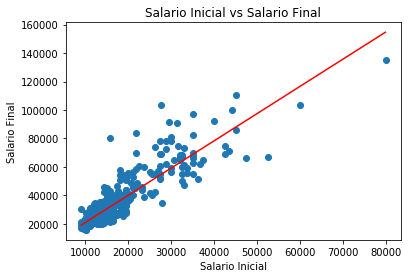

In [ ]:
plt.subplots()
plt.scatter(df_empleados["salini"],df_empleados["salario"])
plt.plot(xp,y,color="r")      
plt.xlabel("Salario Inicial")
plt.ylabel("Salario Final")
plt.title('Salario Inicial vs Salario Final')

# Modelo de Regresión Lineal

In [ ]:
# Creo un modelo de regresión lineal
modelo = LinearRegression()
data = df_empleados.values
x=data[:, 1:7]
y=data[:,7]

# Entreno el modelo con los datos (X,Y)
results=modelo.fit(x,y)
r_sq = modelo.score(x, y)
print('Mean squared error: ',r_sq)
y_pred = modelo.predict(x)
print('intercept:', modelo.intercept_)
print('coefficients:', modelo.coef_)

#print('predicted response:', y_pred, sep='\n')


Mean squared error:  0.8420108789076682
intercept: -9655.044654475983
coefficients: [-1.02298144e+02  5.00312315e+02 -1.05584591e+01  5.84878234e+03
  1.36912951e+00  1.62577643e+02]


Desviación STD:  15690.988798979928
Promedio:  34456.63481953293


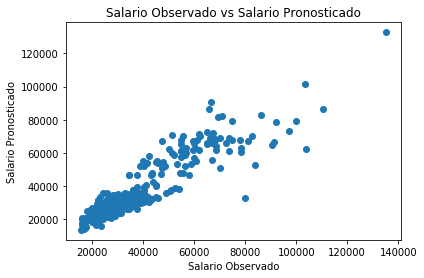

In [ ]:
plt.subplots()
plt.scatter(df_empleados["salario"],y_pred)
plt.plot(color="r")      
plt.xlabel("Salario Observado")
plt.ylabel("Salario Pronosticado")
plt.title('Salario Observado vs Salario Pronosticado')
print('Desviación STD: ',y_pred.std())
print('Promedio: ',y_pred.mean())

# Modelo de Regresión Usando Redes Neuronales

In [ ]:
df2=pd.get_dummies(df_empleados, columns=["sexo"])
df3=  df2[['educ','expprev', 'catlab', 'salini', 'tiempemp', 'sexo_h', 'sexo_m']]
newdf = preprocessing.scale(df3)
salida1 = df_empleados[['salario']]
newsalida=preprocessing.scale(salida1)
newsalida

array([[ 1.31833956e+00],
       [ 3.35872904e-01],
       [-7.60630062e-01],
       [-7.34313991e-01],
       [ 6.16577664e-01],
       [-1.37816377e-01],
       [ 9.02562399e-02],
       [-7.34313991e-01],
       [-3.83433042e-01],
       [-6.11505659e-01],
       [-2.43080662e-01],
       [-3.57116970e-01],
       [-3.92205065e-01],
       [ 3.76240975e-02],
       [-4.18521137e-01],
       [ 3.70960999e-01],
       [ 6.75057822e-01],
       [ 4.05228696e+00],
       [ 4.58681237e-01],
       [-4.79925303e-01],
       [ 2.56924691e-01],
       [-7.43086015e-01],
       [-6.11505659e-01],
       [-1.02379077e+00],
       [-7.78174110e-01],
       [-1.99220543e-01],
       [ 1.51571010e+00],
       [-1.11500306e-01],
       [ 5.87979190e+00],
       [-1.90448520e-01],
       [ 9.90282637e-02],
       [ 4.45433805e+00],
       [ 4.41137189e-01],
       [ 3.36514510e+00],
       [ 2.73648340e+00],
       [-1.81676496e-01],
       [-3.13256852e-01],
       [-1.81676496e-01],
       [ 9.0

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [ ]:
reframed = series_to_supervised(newdf, 0, 1)
reframed.head()

,var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
0,0.522141,0.458086,2.048706,1.265579,1.680122,0.912516,-0.912516
1,0.868519,-0.573475,-0.534803,0.218949,1.680122,0.912516,-0.912516
2,-0.516993,2.721791,-0.534803,-0.637385,1.680122,-1.095872,1.095872
3,-1.902506,0.897455,-0.534803,-0.485148,1.680122,-1.095872,1.095872
4,0.522141,0.400777,-0.534803,0.504393,1.680122,0.912516,-0.912516


In [ ]:
def entradas():
    training_x = newdf#df_empleados[['educ','expprev', 'catlab', 'salini', 'tiempemp']]# reframed#df_empleados[['edad','salini','tiempemp','educ']]
    return training_x

In [ ]:
def salidas():
    target_y = newsalida#df_empleados[['salario']]
    #target_y = target_y.values
    return target_y

In [ ]:
def red():
    modelo = Sequential()
    #agregar capas
    #model.add(SimpleRNN(1, 100))
    modelo.add(Dense(6, input_shape=(7,), kernel_regularizer= l2(0.), activation='relu')) # tanh, sigmoid, relu, tan, normal
    modelo.add(Dense(10, kernel_regularizer= l2(0.), activation='relu'))
    modelo.add(Dense(10, kernel_regularizer= l2(0.), activation='relu'))
    #modelo.add(Dense(5, kernel_regularizer= l2(0.),activation='relu'))
    #modelo.add(Dense(256, kernel_initializer='normal',activation='relu'))
    #modelo.add(Dense(256, kernel_initializer='normal',activation='relu'))
    modelo.add(Dense(1,  kernel_regularizer= l2(0.), activation='linear'))
    
    #modelo.add(Dense(1,  kernel_initializer= 'normal', activation='linear')) # sigmoid sogmax-> para sacar probabilidades en todos los resultados a= 90%, b=30%, c=60%
    modelo.compile(loss='mean_absolute_error', 
                   optimizer = 'sgd', 
                   metrics=[["accuracy"]])
    modelo.fit(entradas(),salidas(), epochs=150)
    modelo.evaluate(entradas(),salidas())
    return modelo

In [ ]:
model=red()
p=model.predict(entradas())
#print(p) 

Epoch 1/150
471/471 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.0000e+00
Epoch 2/150
471/471 [==============================] - 0s 417us/step - loss: 0.6273 - accuracy: 0.0000e+00
Epoch 3/150
471/471 [==============================] - 0s 356us/step - loss: 0.5938 - accuracy: 0.0000e+00
Epoch 4/150
471/471 [==============================] - 0s 167us/step - loss: 0.5641 - accuracy: 0.0000e+00
Epoch 5/150
471/471 [==============================] - 0s 192us/step - loss: 0.5380 - accuracy: 0.0000e+00
Epoch 6/150
471/471 [==============================] - 0s 293us/step - loss: 0.5132 - accuracy: 0.0000e+00
Epoch 7/150
471/471 [==============================] - 0s 417us/step - loss: 0.4850 - accuracy: 0.0000e+00
Epoch 8/150
471/471 [==============================] - 0s 461us/step - loss: 0.4526 - accuracy: 0.0000e+00
Epoch 9/150
471/471 [==============================] - 0s 460us/step - loss: 0.4173 - accuracy: 0.0000e+00
Epoch 10/150
471/471 [=================

Text(0.5, 1.0, 'Salario Observado vs Salario Pronosticado Usando Redes Neuronales')

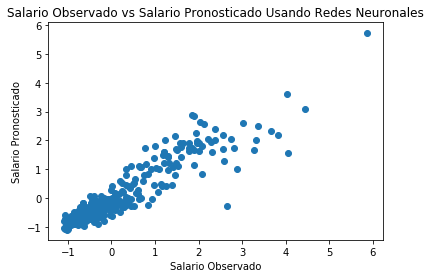

In [ ]:
plt.subplots()
plt.scatter(newsalida,p)
plt.plot(color="r")      
plt.xlabel("Salario Observado")
plt.ylabel("Salario Pronosticado")
plt.title('Salario Observado vs Salario Pronosticado Usando Redes Neuronales')

In [ ]:
error=newsalida-p
def promedio(datos):
    sumatoria = sum(datos)
    print('La sumatoria es: ', sumatoria)

    longitud = float(len(datos))
    print('La longitud es: ', longitud)

    resultado = sumatoria / longitud
    print('El Promedio de error es: ', resultado)


In [ ]:
promedio(error)

La sumatoria es:  [34.88401906]
La longitud es:  471.0
El Promedio de error es:  [0.07406373]


(array([  8.,  50., 282.,  94.,  25.,   6.,   3.,   1.,   1.,   1.]),
 array([-1.02366663, -0.62828663, -0.23290663,  0.16247337,  0.55785338,
         0.95323338,  1.34861338,  1.74399338,  2.13937338,  2.53475339,
         2.93013339]),
 <a list of 10 Patch objects>)

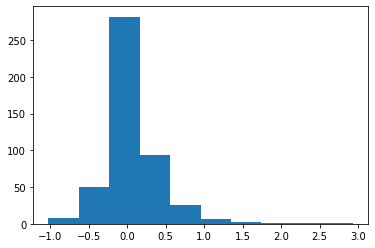

In [ ]:
plt.hist(error)

# Modelos de Clasificación 

###### Con el mismo dataset se busca clasificar la información usando diferentes modelos para esto la variable target será "catlab" la categoria laboral de los empleados

# Modelo SVM - PCA

In [ ]:
import numpy
import random
import sklearn
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  

/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
directorio = "/home/marco/Documentos/Jupyter Notebook/Machine Learning/Proyecto Final/empleados.csv"
dataframe = pd.read_csv(directorio, sep = ',')
dataframe = dataframe[['educ','expprev', 'salini', 'tiempemp','catlab' ]]
print(dataframe.describe())
#dataframe.hist()
#plt.show

X= dataframe[['educ','expprev', 'salini', 'tiempemp']].values
Y = dataframe['catlab'].values

             educ     expprev        salini    tiempemp      catlab
count  471.000000  471.000000    471.000000  471.000000  471.000000
mean    13.492569   96.040340  17024.150743   81.218684    1.414013
std      2.890087  104.806978   7890.819526    9.998774    0.774964
min      8.000000    0.000000   9000.000000   63.000000    1.000000
25%     12.000000   19.500000  12450.000000   73.000000    1.000000
50%     12.000000   55.000000  15000.000000   81.000000    1.000000
75%     15.000000  140.500000  17490.000000   90.000000    1.000000
max     21.000000  476.000000  79980.000000   98.000000    3.000000


###### Aplicamos PCA

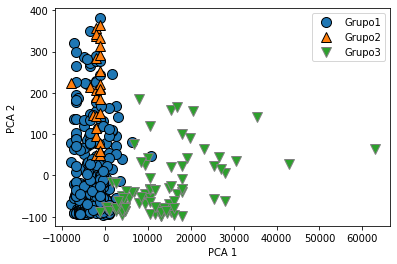

In [ ]:
pca = PCA(n_components = 2)
pca.fit(dataframe)

transformada = pca.transform(dataframe)

plt.figure(0)
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], Y)
plt.legend(["Grupo1", "Grupo2", "Grupo3"], loc = 'best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

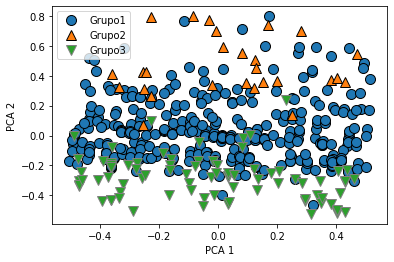

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escala=MinMaxScaler()
escala.fit(X)
escalada = escala.transform(X)
pca.fit(escalada)
transformada = pca.transform(escalada)
plt.figure(1)
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], Y)
plt.legend(["Grupo1", "Grupo2", "Grupo3"] ,loc = 'best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(transformada, Y, test_size=0.4, random_state = 100)
svclassifier = SVC(kernel = 'linear', gamma = 10)  
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))

score=svclassifier.score(X_train, y_train)
print('ACC train: ', score)
scoreTest= svclassifier.score(X_test, y_test)
print('ACC test: ', scoreTest)

[[140   0   0]
 [ 15   0   0]
 [ 22   0  12]]
ACC train:  0.8404255319148937
ACC test:  0.8042328042328042


# Modelo KNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd

               id        educ     expprev      catlab        salini  \
count  471.000000  471.000000  471.000000  471.000000    471.000000   
mean   236.080679   13.492569   96.040340    1.414013  17024.150743   
std    136.239065    2.890087  104.806978    0.774964   7890.819526   
min      1.000000    8.000000    0.000000    1.000000   9000.000000   
25%    118.500000   12.000000   19.500000    1.000000  12450.000000   
50%    236.000000   12.000000   55.000000    1.000000  15000.000000   
75%    353.500000   15.000000  140.500000    1.000000  17490.000000   
max    472.000000   21.000000  476.000000    3.000000  79980.000000   

         tiempemp        salario  
count  471.000000     471.000000  
mean    81.218684   34456.634820  
std      9.998774   17117.998565  
min     63.000000   15750.000000  
25%     73.000000   24000.000000  
50%     81.000000   28800.000000  
75%     90.000000   37275.000000  
max     98.000000  135000.000000  


<function matplotlib.pyplot.show(*args, **kw)>

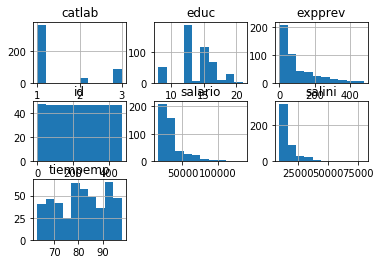

In [ ]:
directorio = "/home/marco/Documentos/Jupyter Notebook/Machine Learning/Proyecto Final/empleados.csv"
dataframe = pd.read_csv(directorio, sep = ',')
print(dataframe.describe())
dataframe.hist()
plt.show

In [ ]:
X= dataframe[['educ','expprev', 'salini', 'tiempemp']].values
Y = dataframe['catlab'].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,  test_size=0.4, random_state = 100)

scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
n_k = 5
knn=KNeighborsClassifier(n_k)
knn.fit(X_train, Y_train)
score=knn.score(X_train, Y_train)
print('ACC train: ', score)


scoreTest= knn.score(X_test, Y_test)
print('ACC test: ', scoreTest)

predict=knn.predict(X_test)

print(confusion_matrix(Y_test, predict))
print(classification_report(Y_test, predict))

ACC train:  0.9042553191489362
ACC test:  0.8465608465608465
[[140   0   0]
 [ 14   1   0]
 [ 15   0  19]]
              precision    recall  f1-score   support

           1       0.83      1.00      0.91       140
           2       1.00      0.07      0.12        15
           3       1.00      0.56      0.72        34

    accuracy                           0.85       189
   macro avg       0.94      0.54      0.58       189
weighted avg       0.87      0.85      0.81       189



<Figure size 3600x3600 with 0 Axes>

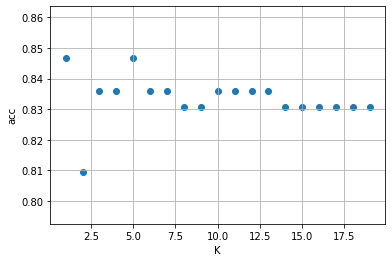

In [ ]:
k_range = range(1,20) # aqui se ingresa cuantas veces vamos a revisar el mejor k(1-100)
scores=[]

for k in k_range:
    knn= knn = KNeighborsClassifier (n_neighbors=k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))

plt.figure(figsize=(50,50))
plt.figure()
plt.xlabel('K')
plt.ylabel('acc')
plt.scatter(k_range, scores)
plt.grid()
plt.show()

# RESUMEN

OBJETIVO |MODELO | TIPO| S/NS| Resultado
--|--|--|--|--
Predecir el salario final|Regresión Lineal| Serie Temporal|Supervisado| Mean squared error:  0.842
Predecir el salario final|Red Neuronal|Serie Temporal|Supervisado| El Promedio de error es:0.074
Clasificar la escala salarial para cada empleado|SVM|Clasificador|Supervisado| ACC train:  0.840 ACC test:  0.804
Clasificar la escala salarial para cada empleado|KNN|Clasificador| Supervisado| ACC train: 0.904 ACC test:  0.846